In [1]:
import os
import sys
import numpy as np
import tensorflow as tf
from train_mnist_helper import *

mnist_dir = '/Users/haekyu/data/interpretable-ml/mnist'
model_dir = '/Users/haekyu/data/interpretable-ml/result/model'

In [2]:
one_pixel_path = '/Users/haekyu/data/interpretable-ml/one-pixel-attack-mnist'
sys.path.insert(0, one_pixel_path)

In [3]:
import helper
from differential_evolution import differential_evolution
from networks.lenet import LeNet
from networks.pure_cnn import PureCnn
from networks.network_in_network import NetworkInNetwork
from networks.resnet import ResNet
from networks.densenet import DenseNet
from networks.wide_resnet import WideResNet
from networks.capsnet import CapsNet

Using TensorFlow backend.


In [5]:
from tensorflow.examples.tutorials.mnist import input_data

mnist_data = input_data.read_data_sets(mnist_dir)
train_data = mnist_data.train
test_data = mnist_data.test 

x_train = train_data.images.reshape(-1, 28, 28)
y_train = np.asarray(train_data.labels, dtype=np.int32)
x_test = test_data.images.reshape(-1, 28, 28)
y_test = np.asarray(test_data.labels, dtype=np.int32)

Extracting /Users/haekyu/data/interpretable-ml/mnist/train-images-idx3-ubyte.gz
Extracting /Users/haekyu/data/interpretable-ml/mnist/train-labels-idx1-ubyte.gz
Extracting /Users/haekyu/data/interpretable-ml/mnist/t10k-images-idx3-ubyte.gz
Extracting /Users/haekyu/data/interpretable-ml/mnist/t10k-labels-idx1-ubyte.gz


In [6]:
tf.reset_default_graph()
layers = make_network()
x, y, training, conv1, pool1, conv2, pool2, pool2_flat, fc, logits = layers
train_op, loss_tensor, accuracy_tensor = make_train_op(logits, y)

In [21]:
# Get the checkpoint
checkpoint_path = os.path.join(model_dir, "mnist_network")
ckpt = tf.train.get_checkpoint_state(model_dir)

# Open a session and initialize parameters
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Load the pretrained model
saver = tf.train.Saver()
saver.restore(sess, ckpt.model_checkpoint_path)

trainable_vars = tf.get_collection('trainable_variables')

INFO:tensorflow:Restoring parameters from /Users/haekyu/data/interpretable-ml/result/model/mnist_network-200


INFO:tensorflow:Restoring parameters from /Users/haekyu/data/interpretable-ml/result/model/mnist_network-200


In [22]:
trainable_vars

[<tf.Variable 'training:0' shape=() dtype=bool_ref>,
 <tf.Variable 'conv1/kernel:0' shape=(5, 5, 3, 32) dtype=float32_ref>,
 <tf.Variable 'conv1/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'conv2/kernel:0' shape=(5, 5, 32, 64) dtype=float32_ref>,
 <tf.Variable 'conv2/bias:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'fc/kernel:0' shape=(3136, 1024) dtype=float32_ref>,
 <tf.Variable 'fc/bias:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'logits/kernel:0' shape=(1024, 10) dtype=float32_ref>,
 <tf.Variable 'logits/bias:0' shape=(10,) dtype=float32_ref>]

In [35]:
'''
Get hidden units' activation values for an input
'''
def get_neural_activations(sess, layers, image):
    # Layers
    x, y, training, conv1, pool1, conv2, pool2, pool2_flat, fc, logits = layers

    # conv1
    conv1_val = sess.run(conv1, feed_dict={x: image})

    # pool1
    pool1_val = sess.run(pool1, feed_dict={conv1: conv1_val})
    
    # conv2
    conv2_val = sess.run(conv2, feed_dict={pool1: pool1_val})

    # pool2
    pool2_val = sess.run(pool2, feed_dict={conv2: conv2_val})

    # pool2_flat
    pool2_flat_val = pool2_val.reshape([-1, 7 * 7 * 64])

    # fc
    fc_val = sess.run(fc, feed_dict={pool2_flat: pool2_flat_val})

    # logits
    logits_val = sess.run(logits, feed_dict={fc: fc_val})

    # Values
    values = [conv1_val, pool1_val]
    values += [conv2_val, pool2_val, pool2_flat_val]
    values += [fc_val, logits_val]
    
    return values

In [24]:
F = sess.run(trainable_vars[3])
F.shape

(5, 5, 32, 64)

In [8]:
sess.run(training.assign(False))

x_batch, y_batch = test_data.next_batch(1024)
x_batch = x_batch.reshape([-1, 28, 28, 1])
x_batch = np.tile(x_batch, 3)
loss, accuracy = sess.run([loss_tensor, accuracy_tensor],
                         feed_dict={x: x_batch, y: y_batch})

print("Final loss: {:.3f}, accuracy: {:.3f}".format(loss, accuracy))

Final loss: 0.054, accuracy: 0.979


In [34]:
pool1_val.shape
F.shape

(5, 5, 32, 64)

Input


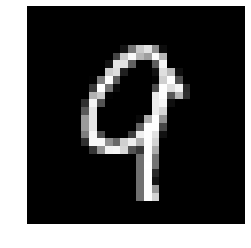

0-th channel in conv2


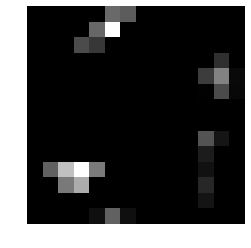

0-th channel in pool1


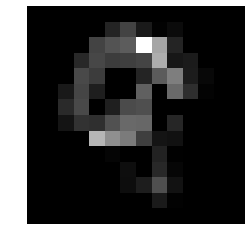

%d-th filter slice between pool1 and conv2, for conv2_0th channel


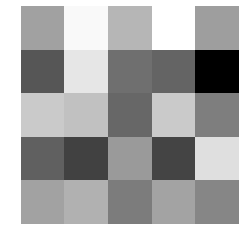

%-th conv output


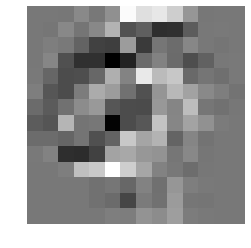

1-th channel in pool1


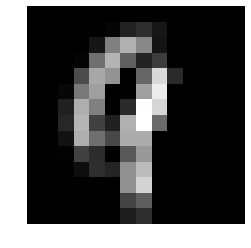

%d-th filter slice between pool1 and conv2, for conv2_0th channel


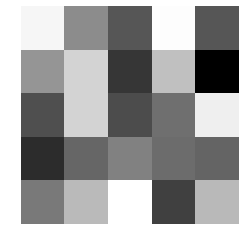

%-th conv output


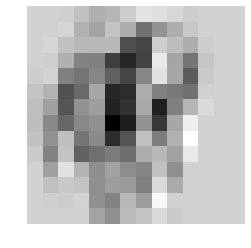

2-th channel in pool1


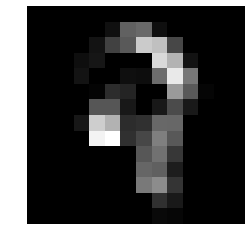

%d-th filter slice between pool1 and conv2, for conv2_0th channel


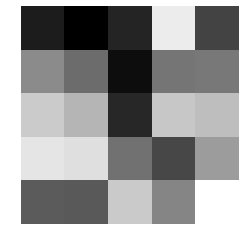

%-th conv output


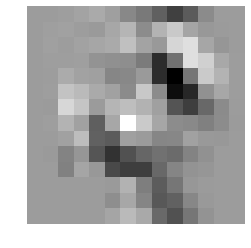

3-th channel in pool1


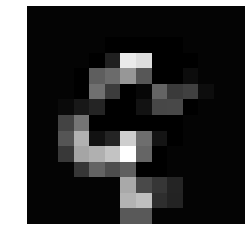

%d-th filter slice between pool1 and conv2, for conv2_0th channel


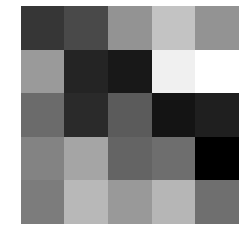

%-th conv output


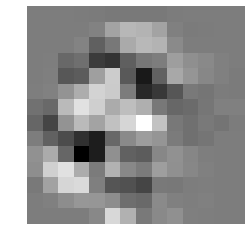

4-th channel in pool1


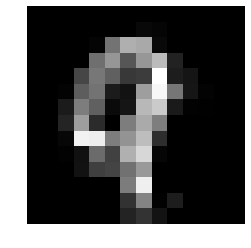

%d-th filter slice between pool1 and conv2, for conv2_0th channel


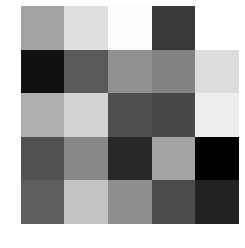

%-th conv output


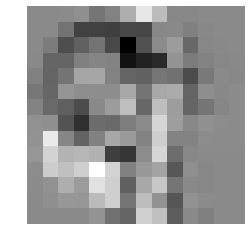

5-th channel in pool1


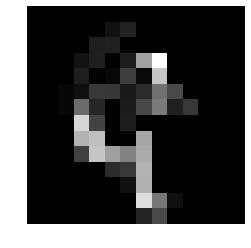

%d-th filter slice between pool1 and conv2, for conv2_0th channel


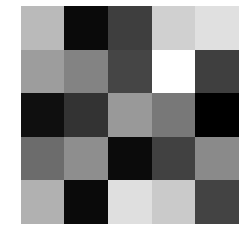

%-th conv output


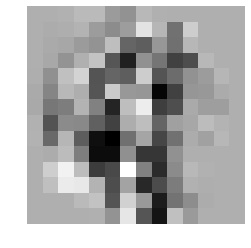

6-th channel in pool1


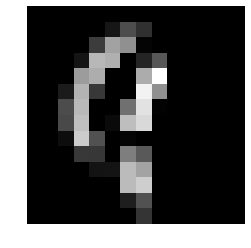

%d-th filter slice between pool1 and conv2, for conv2_0th channel


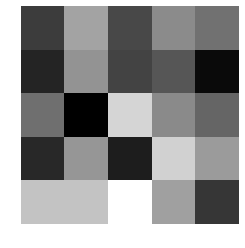

%-th conv output


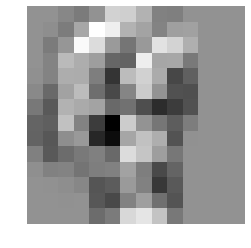

7-th channel in pool1


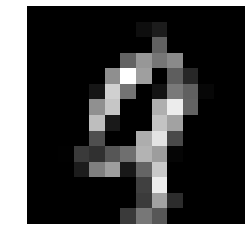

%d-th filter slice between pool1 and conv2, for conv2_0th channel


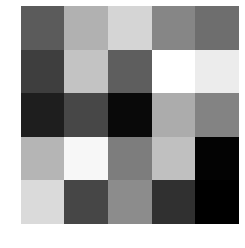

%-th conv output


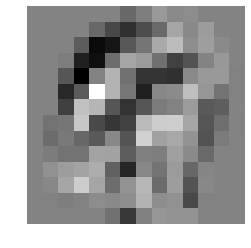

8-th channel in pool1


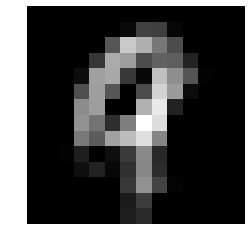

%d-th filter slice between pool1 and conv2, for conv2_0th channel


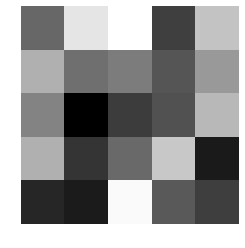

%-th conv output


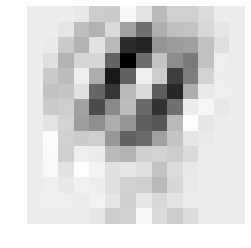

9-th channel in pool1


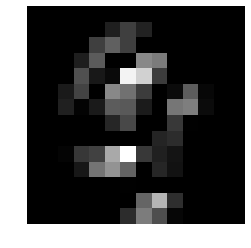

%d-th filter slice between pool1 and conv2, for conv2_0th channel


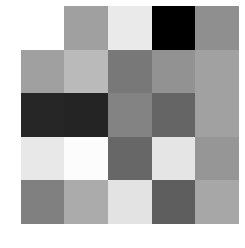

%-th conv output


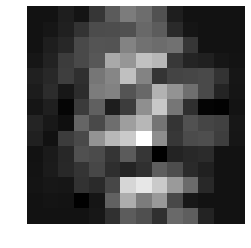

10-th channel in pool1


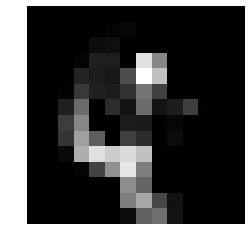

%d-th filter slice between pool1 and conv2, for conv2_0th channel


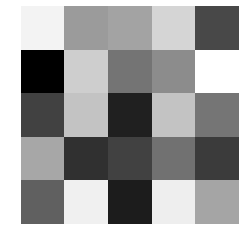

%-th conv output


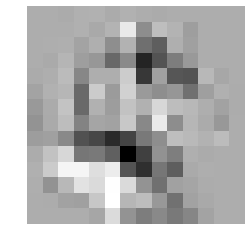

11-th channel in pool1


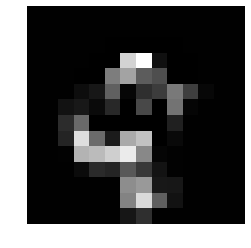

%d-th filter slice between pool1 and conv2, for conv2_0th channel


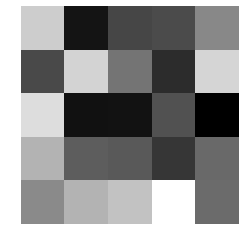

%-th conv output


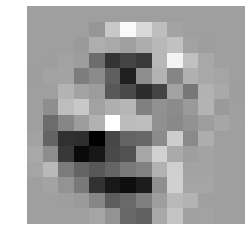

12-th channel in pool1


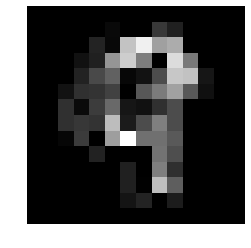

%d-th filter slice between pool1 and conv2, for conv2_0th channel


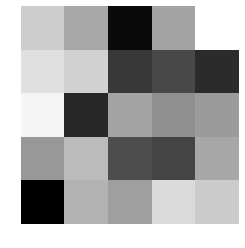

%-th conv output


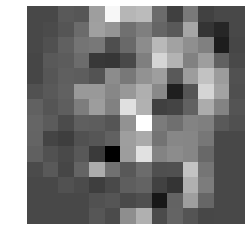

13-th channel in pool1


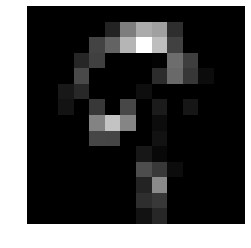

%d-th filter slice between pool1 and conv2, for conv2_0th channel


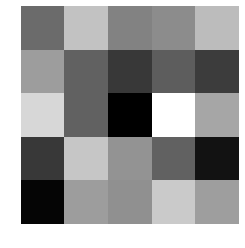

%-th conv output


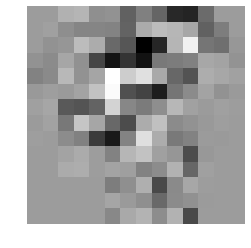

14-th channel in pool1


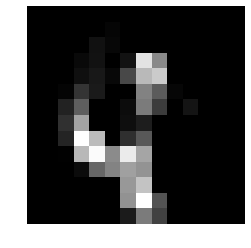

%d-th filter slice between pool1 and conv2, for conv2_0th channel


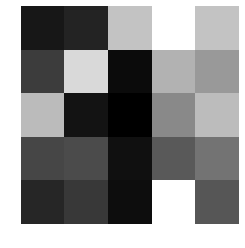

%-th conv output


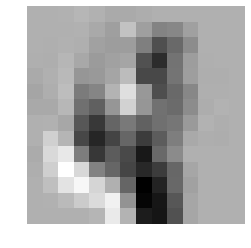

15-th channel in pool1


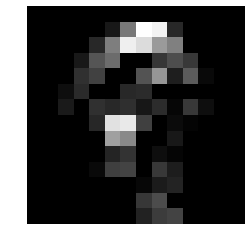

%d-th filter slice between pool1 and conv2, for conv2_0th channel


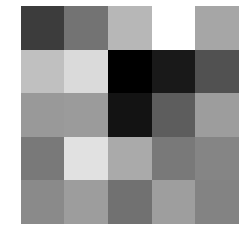

%-th conv output


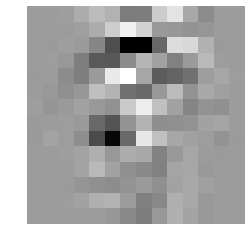

16-th channel in pool1


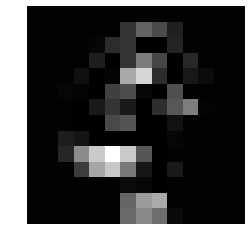

%d-th filter slice between pool1 and conv2, for conv2_0th channel


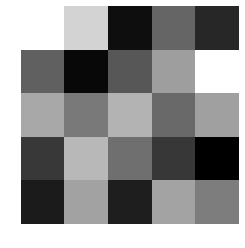

%-th conv output


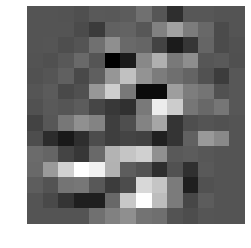

17-th channel in pool1


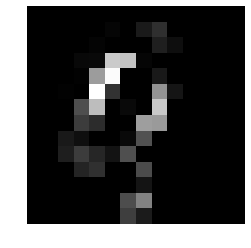

%d-th filter slice between pool1 and conv2, for conv2_0th channel


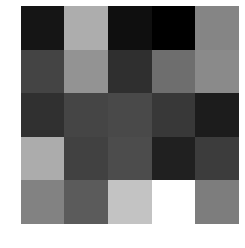

%-th conv output


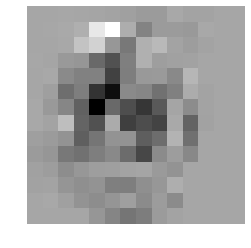

18-th channel in pool1


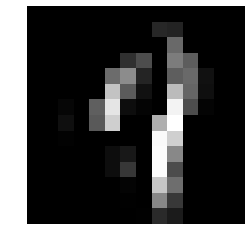

%d-th filter slice between pool1 and conv2, for conv2_0th channel


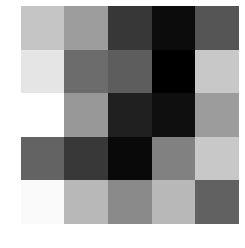

%-th conv output


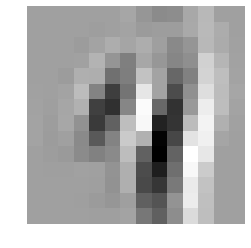

19-th channel in pool1


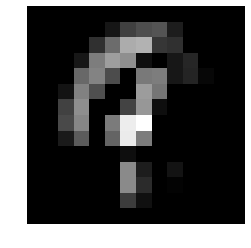

%d-th filter slice between pool1 and conv2, for conv2_0th channel


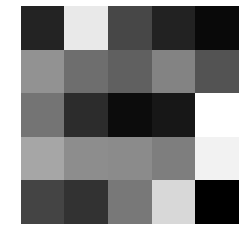

%-th conv output


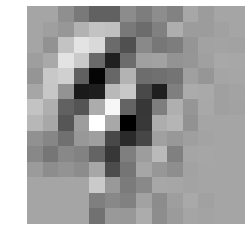

20-th channel in pool1


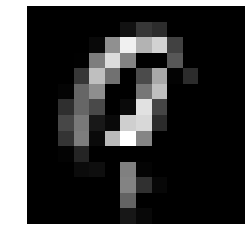

%d-th filter slice between pool1 and conv2, for conv2_0th channel


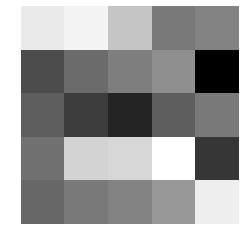

%-th conv output


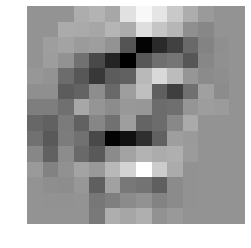

21-th channel in pool1


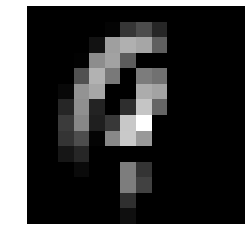

%d-th filter slice between pool1 and conv2, for conv2_0th channel


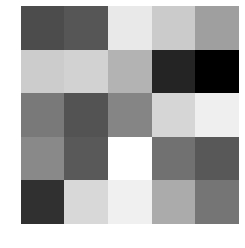

%-th conv output


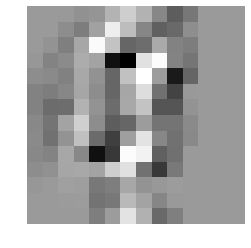

22-th channel in pool1


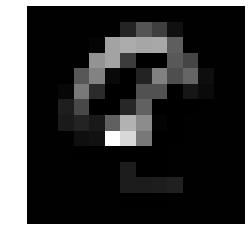

%d-th filter slice between pool1 and conv2, for conv2_0th channel


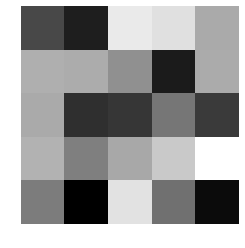

%-th conv output


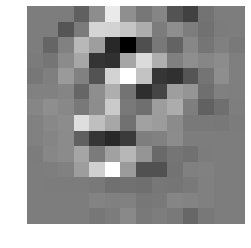

23-th channel in pool1


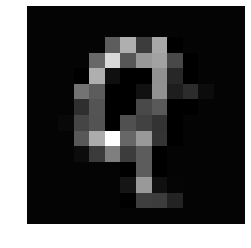

%d-th filter slice between pool1 and conv2, for conv2_0th channel


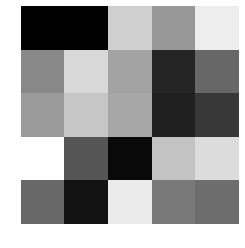

%-th conv output


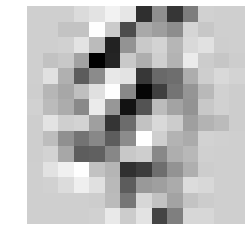

24-th channel in pool1


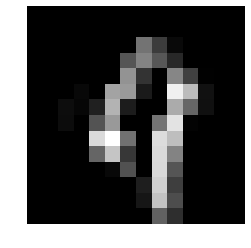

%d-th filter slice between pool1 and conv2, for conv2_0th channel


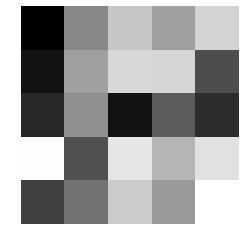

%-th conv output


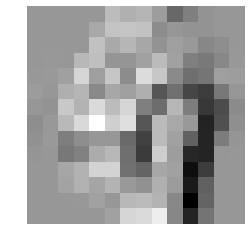

25-th channel in pool1


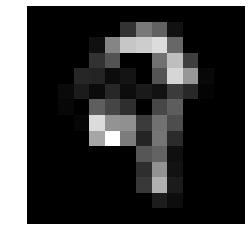

%d-th filter slice between pool1 and conv2, for conv2_0th channel


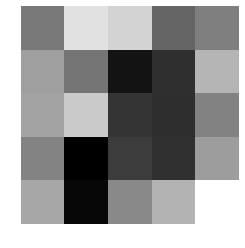

%-th conv output


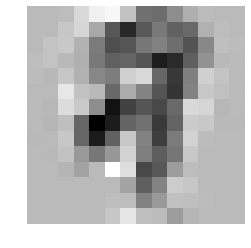

26-th channel in pool1


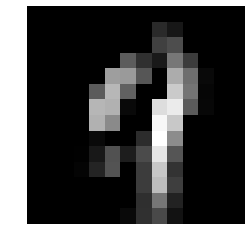

%d-th filter slice between pool1 and conv2, for conv2_0th channel


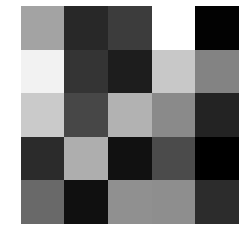

%-th conv output


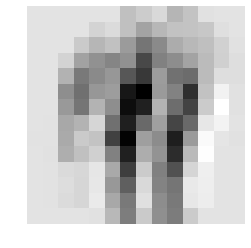

27-th channel in pool1


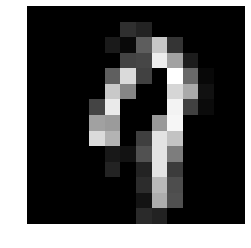

%d-th filter slice between pool1 and conv2, for conv2_0th channel


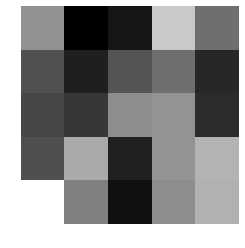

%-th conv output


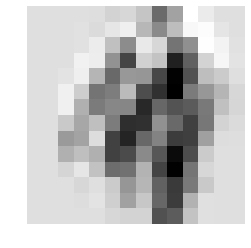

28-th channel in pool1


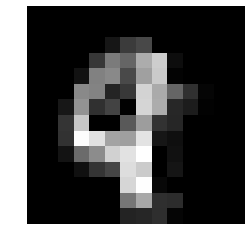

%d-th filter slice between pool1 and conv2, for conv2_0th channel


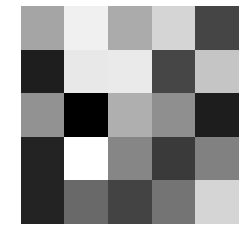

%-th conv output


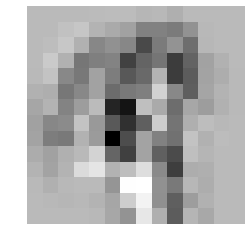

29-th channel in pool1


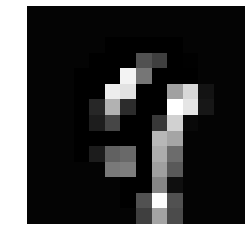

%d-th filter slice between pool1 and conv2, for conv2_0th channel


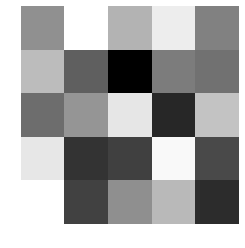

%-th conv output


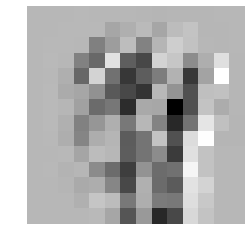

30-th channel in pool1


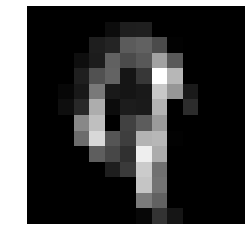

%d-th filter slice between pool1 and conv2, for conv2_0th channel


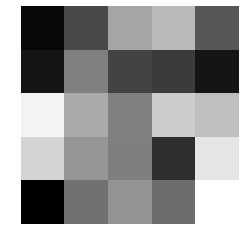

%-th conv output


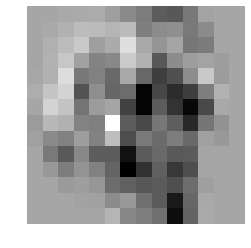

31-th channel in pool1


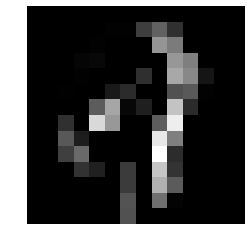

%d-th filter slice between pool1 and conv2, for conv2_0th channel


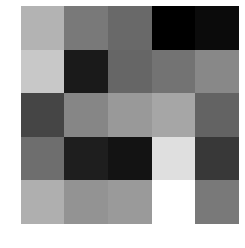

%-th conv output


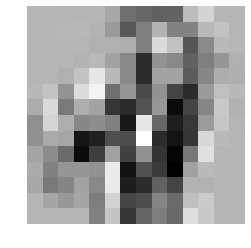

In [36]:
from matplotlib import pyplot as plt
from cv2 import filter2D

imageth = 627

print('Input')
image = x_test[imageth]
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image_cp = image.reshape(1, 28, 28, 1)
image_cp = np.tile(image_cp, 3)
values = get_neural_activations(sess, layers, image_cp)
conv1_val, pool1_val, conv2_val, pool2_val, pool2_flat_val, fc_val, logits_val = values

print('0-th channel in conv2')
image = x_test[imageth]
plt.imshow(conv2_val[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()

for i in range(32):
    print('%d-th channel in pool1' % i)
    plt.imshow(pool1_val[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.show()
    
    print('%d-th filter slice between pool1 and conv2, for conv2_0th channel')
    plt.imshow(F[:, :, i, 0], cmap='gray')
    plt.axis('off')
    plt.show()
    
    f = F[:, :, i, 0]
    print('%-th conv output')
    c_output = filter2D(pool1_val[0, :, :, i], -1, f)
    plt.imshow(c_output, cmap='gray')
    plt.axis('off')
    plt.show()
    